In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.ndimage as ndimage
from skimage import feature
%matplotlib inline
plt.rcParams.update({'image.interpolation': None})
plt.rcParams.update({'font.size': 15})

## 10-05 Edge Detection

### (a) Thresholded Gradient Image:

#### (a-i)

The intensity range of normalized image is [0.0, 1.0]


Text(0.5, 1.0, 'The image of headCT with normalized intensity')

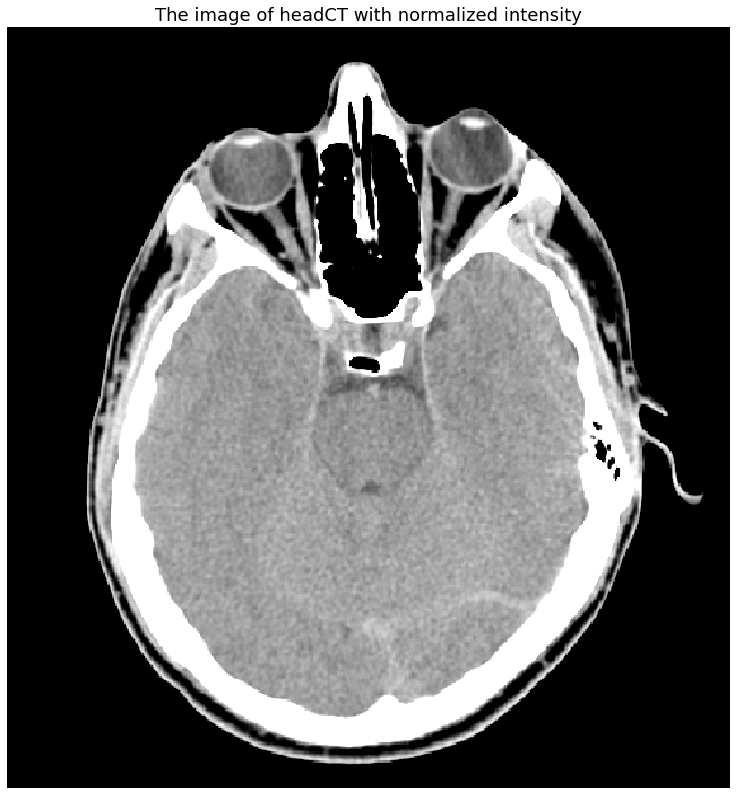

In [2]:
A = np.asarray(imageio.imread('headCT.tif'))
A = A/255
print('The intensity range of normalized image is [%s, %s]' %(np.min(A),np.max(A)))
plt.figure(figsize=(20,14))
plt.imshow(A,cmap='gray')
plt.axis('off')
plt.title('The image of headCT with normalized intensity')

#### (a-ii)

Text(0.5, 1.0, 'The smooted image of headCT with a 5x5 averaging filter')

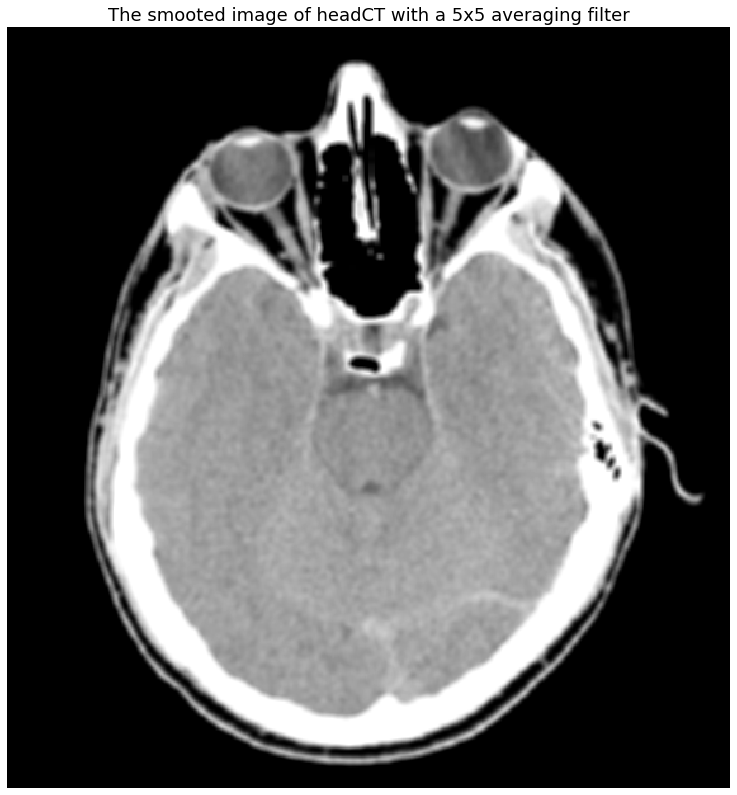

In [3]:
h_ave =  np.ones((5,5),np.float32)/25
A_smoothed = ndimage.convolve(A, h_ave, mode='reflect')
plt.figure(figsize=(20,14))
plt.imshow(A_smoothed,cmap='gray')
plt.axis('off')
plt.title('The smooted image of headCT with a 5x5 averaging filter')

The original image which is illustrated in the previous part is sharp and the border between two different intensities is vividly distinguishable. However, the smoothed image is blurred compared to the original image and the edges are not discernible easily, especially in the small regions with different intensities.

#### (a-iii)

Text(0.5, 1.0, 'The gradient image with summation of |gx| obtained from soble_horiz and |gy| obtained from sobel_vert')

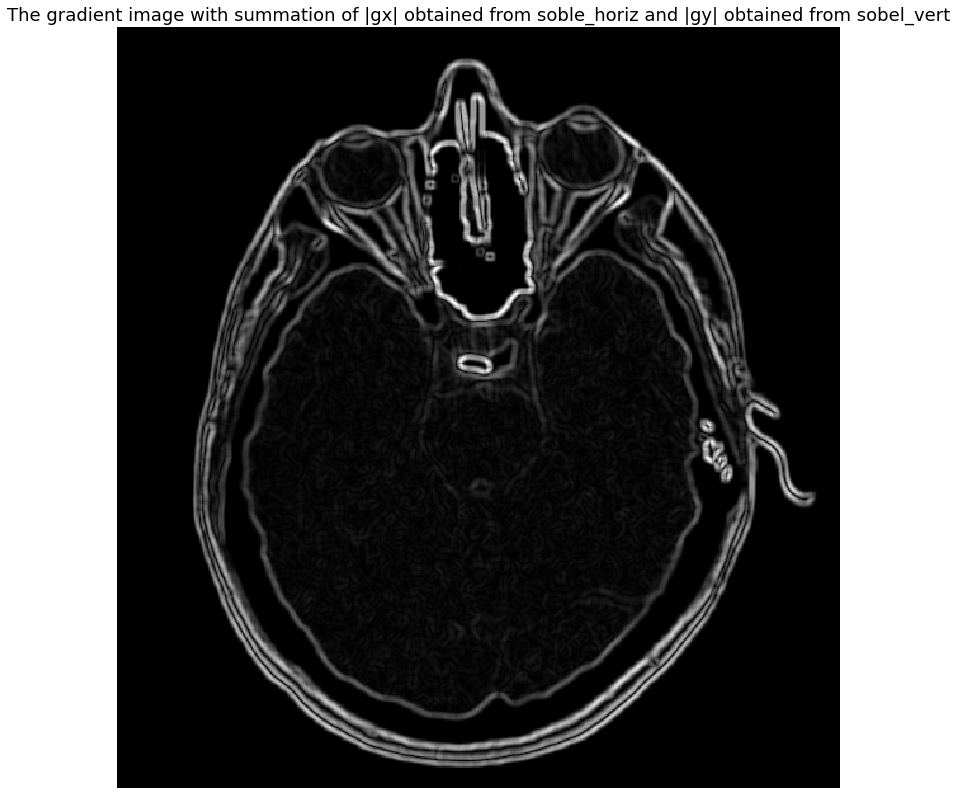

In [4]:
sobel_horiz = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_vert = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
gx = ndimage.convolve(A_smoothed, sobel_horiz, mode='reflect')
gy = ndimage.convolve(A_smoothed, sobel_vert, mode='reflect')
g = abs(gx) + abs(gy)
plt.figure(figsize=(20,14))
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.title('The gradient image with summation of |gx| obtained from soble_horiz and |gy| obtained from sobel_vert')

#### (a-iv)

Text(0.5, 1.0, 'The thresholded gradient of the smoothed image')

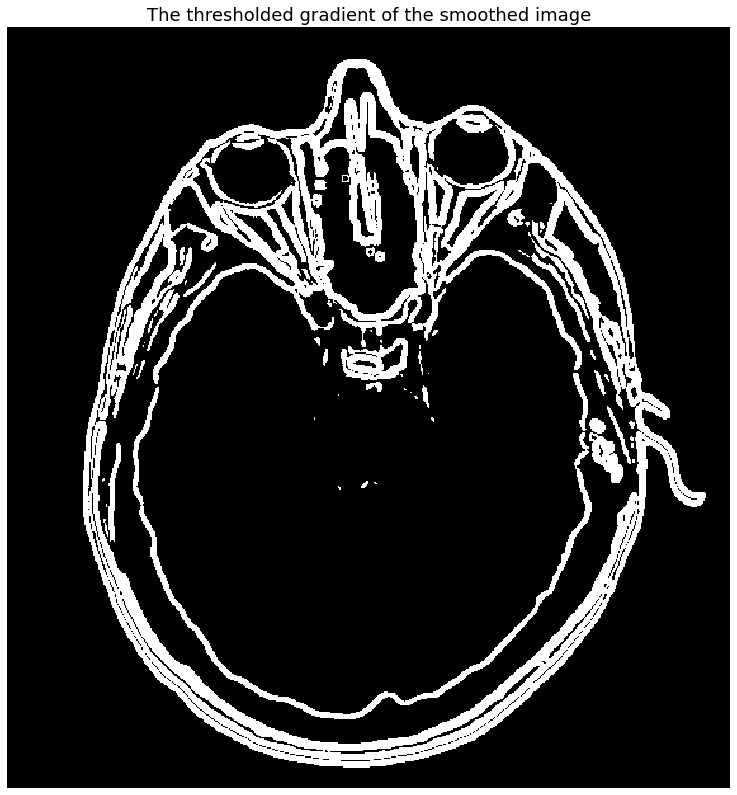

In [5]:
threshold = 0.15*(np.max(g))
g_thresh = np.where(g < threshold, 0, 1)
plt.figure(figsize=(20,14))
plt.imshow(g_thresh,cmap='gray')
plt.axis('off')
plt.title('The thresholded gradient of the smoothed image')

By comparing the appearance of g and g_threshold, it is clear that the edges determined in g are thinner than the edges in g_threshold. Also, some edges specified in g have gray color, and some of them have white color. In g some grayish edges are determined in the center of the headCT image, which is not visible in g_threshold.

If the value of the threshold has not been given, I choose this value by trial and error. As the edges have high intensity and the background has low intensity, I try different percentages of max values as a threshold (for example, from 5% to 20% of max value). Then, I choose the value that gives the better result in determining the edges.

### (b) Canny Edge Detector I (Default Parameters):

Text(0.5, 1.0, 'Image obtained using Canny algorithm with defualt paprameters')

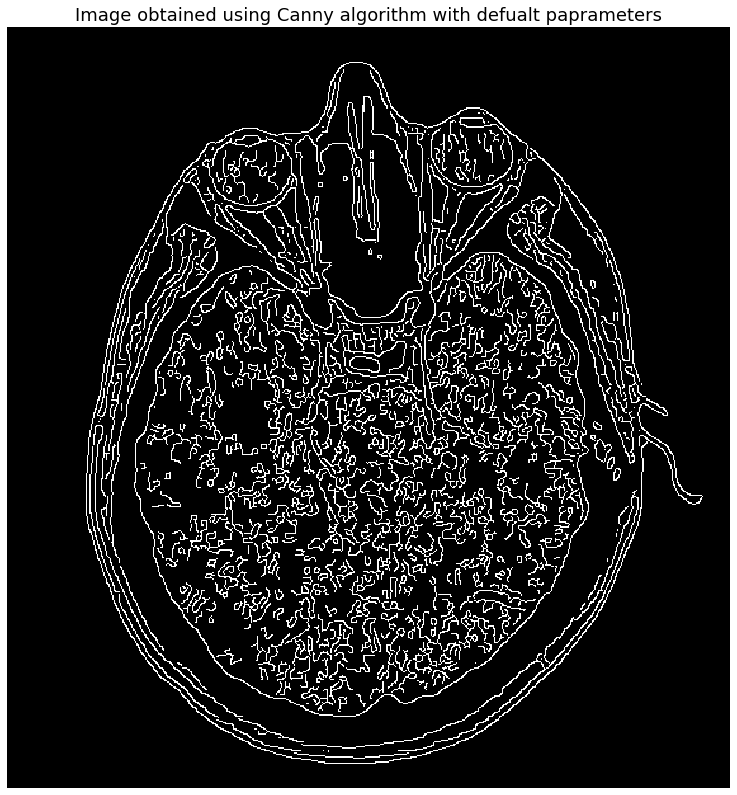

In [6]:
A_canny_default = feature.canny(A)
plt.figure(figsize=(20,14))
plt.imshow(A_canny_default,cmap='gray')
plt.axis('off')
plt.title('Image obtained using Canny algorithm with defualt paprameters')

The resulting image is not similar to figure 10.26(d). There is a huge difference between the edges detected in this image and figure 10.26(d). The default parameters of this algorithm are 1 for sigma (σ=1) and the default value of the lower bound is set to 10% of the image’s max and the upper bound default value is set to 20% of the image’s max. These default parameters do not match the parameters used for obtaining figure 10.26(d).

### (c) Canny Edge Detector II:

Text(0.5, 1.0, 'Image obtained using Canny algorithm with TL=0.05, TH= 0.15 and σ=2,')

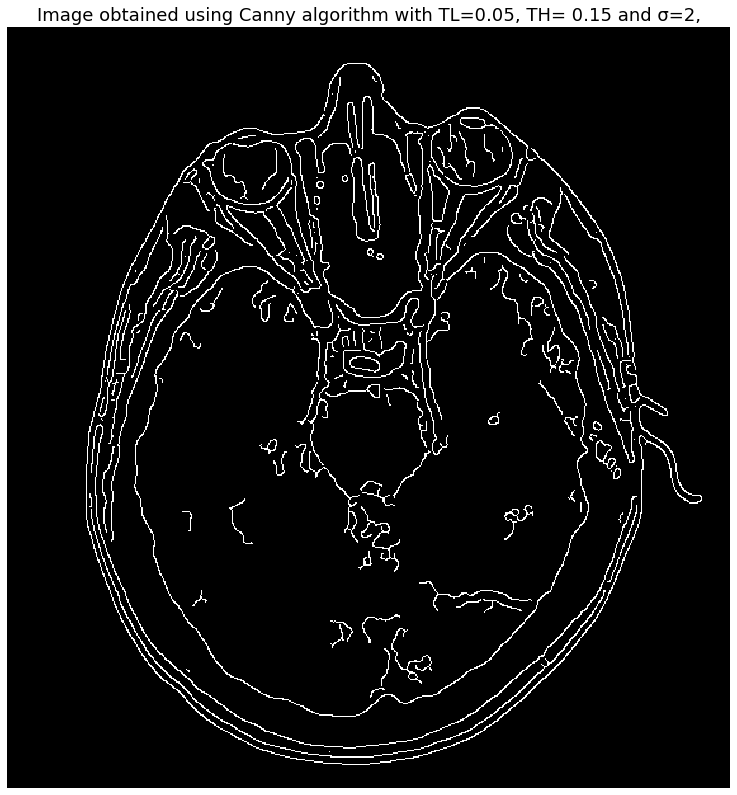

In [7]:
A_canny = feature.canny(A, sigma=2, low_threshold=0.05, high_threshold=0.15)
plt.figure(figsize=(20,14))
plt.imshow(A_canny,cmap='gray')
plt.axis('off')
plt.title('Image obtained using Canny algorithm with TL=0.05, TH= 0.15 and σ=2,')

The resulting image differs from the figure 10.26(d). The value of the lower and upper threshold and the sigma of the Canny edge detector has a direct effect on the detecting edges as it is obvious by comparison of the resulting image of this part and the previous part. The resulting image of part b detects all the edges in the original image with details and all the detected edges are unbroken. However, the resulting image in this part has some broken lines and fewer edges are specified in this image.

In addition, the reason for the different appearance of this image with figure 10.26(d) is this image is obtained by applying to the original image but the figure 10.26(d) was obtained by applying to the smoothed image with kernel size 13x13.

 ## 10-06 Edge Linking

### (a) Display Original Image:

Text(0.5, 1.0, 'The original image of the van rear')

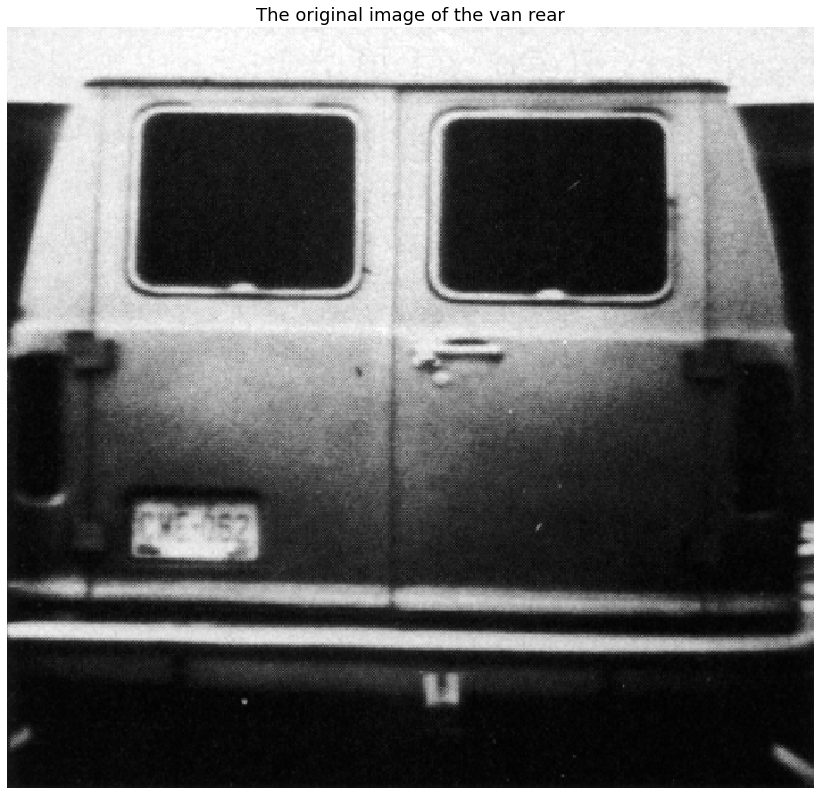

In [8]:
I = np.asarray(imageio.imread('van-rear.tif'))
I = I/255
plt.figure(figsize=(20,14))
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.title('The original image of the van rear')

### (b) Compute Gradient Images:

In [10]:
sobel_horiz = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_vert = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
gx = ndimage.convolve(I, sobel_horiz, mode='reflect')
gy = ndimage.convolve(I, sobel_vert, mode='reflect')
M = np.sqrt((gx**2+gy**2))
alpha = np.rad2deg(np.arctan(gy/(gx+0.0000001)))

Text(0.5, 1.0, 'The gradient magnitude image')

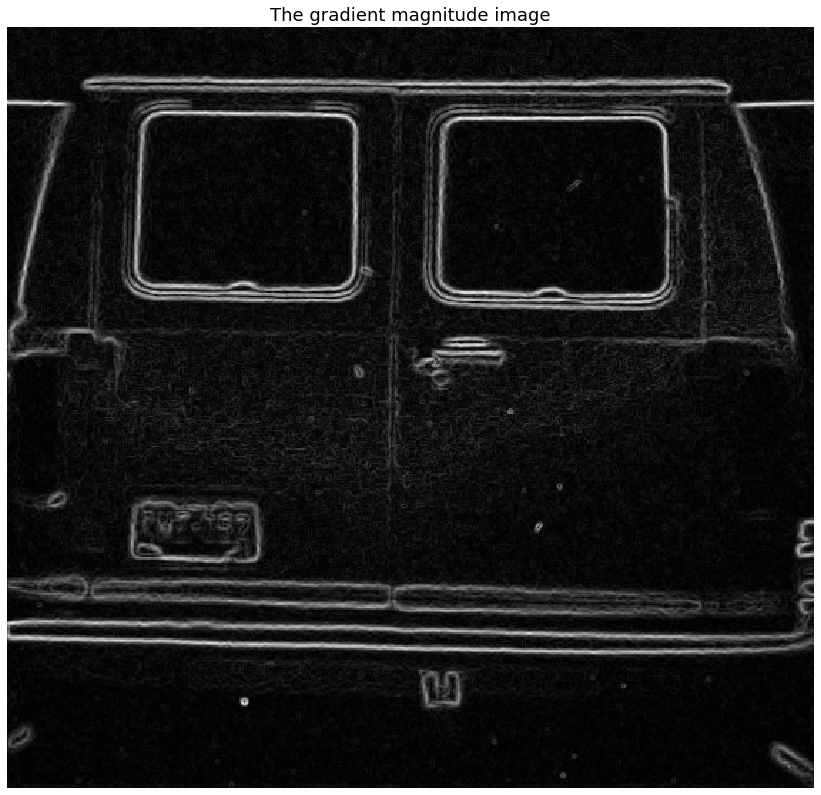

In [50]:
plt.figure(figsize=(20,14))
plt.imshow(M,cmap='gray')
plt.axis('off')
plt.title('The gradient magnitude image')

Text(0.5, 1.0, 'The gradient angle image')

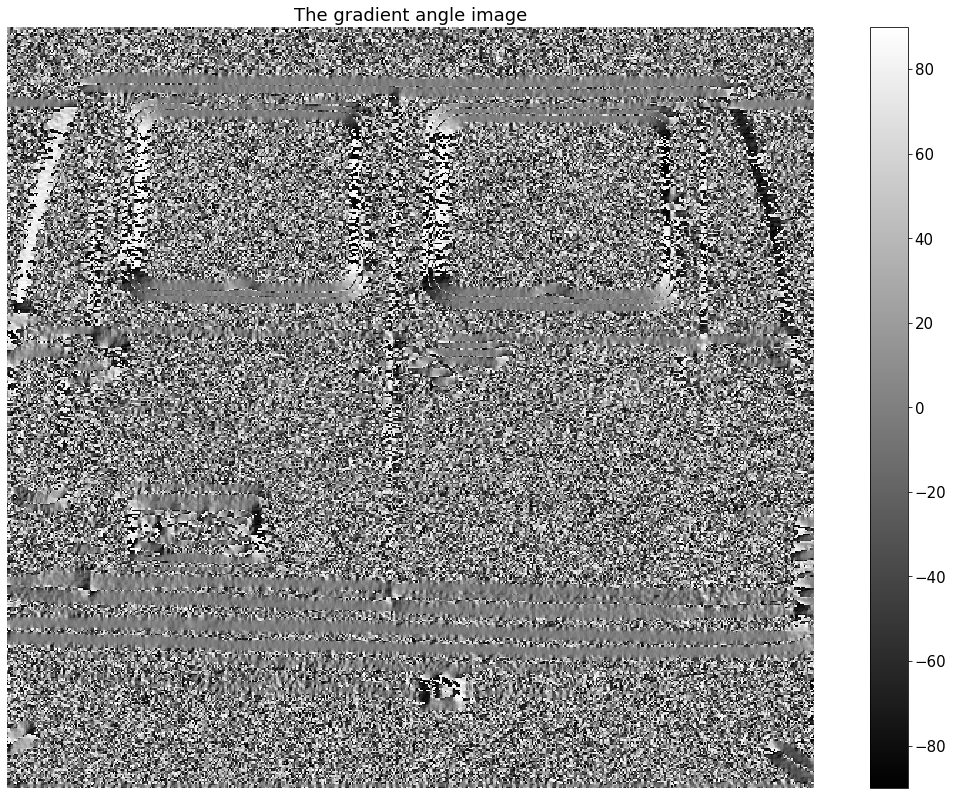

In [11]:
plt.figure(figsize=(20,14))
plt.imshow(alpha,cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('The gradient angle image')

The sobel filter is applied in the origianl image and helps to detect edge pixels in the image. The magnitude of this image (M) shows the edges with bright intensities. So the magnitude gradient image show the locations of image edges. The image of alpha shows the direction of this edges. With the help of colorbar, we can conclude from the gradient angle that the pixels with gray intensities has zero angle so these pixels are horizontal edges. The white  and black pixels shows the angel of 90 and -90 respectively which allocated to vertical edges. 

### (c) Compute Horizontally and Vertically Oriented Pixels:

In [52]:
Tm = 0.3*np.max(M)
Ta = 45
gh = np.where((M > Tm)&((alpha < Ta)&(alpha > -Ta)), 1, 0)

Text(0.5, 1.0, 'The horizontally connected edge pixels')

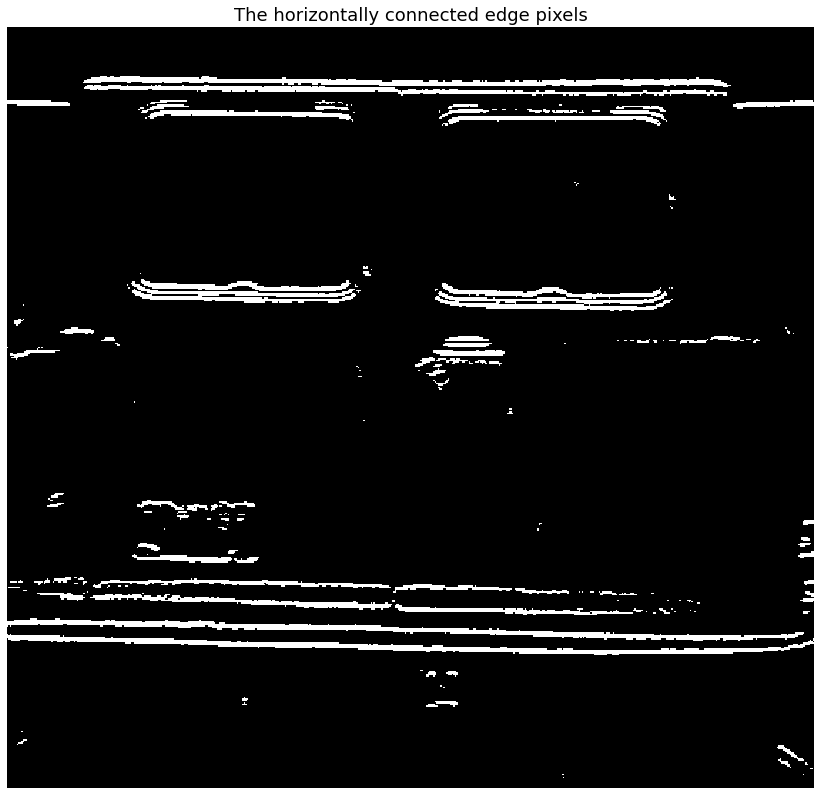

In [53]:
plt.figure(figsize=(20,14))
plt.imshow(gh,cmap='gray')
plt.axis('off')
plt.title('The horizontally connected edge pixels')

In [54]:
Tm = 0.3*np.max(M)
Ta = 45
A = 90
gv = np.where((M > Tm)&((np.abs(alpha) < A+Ta)&(np.abs(alpha) > A-Ta)), 1 , 0)

Text(0.5, 1.0, 'The vertically connected edge pixels')

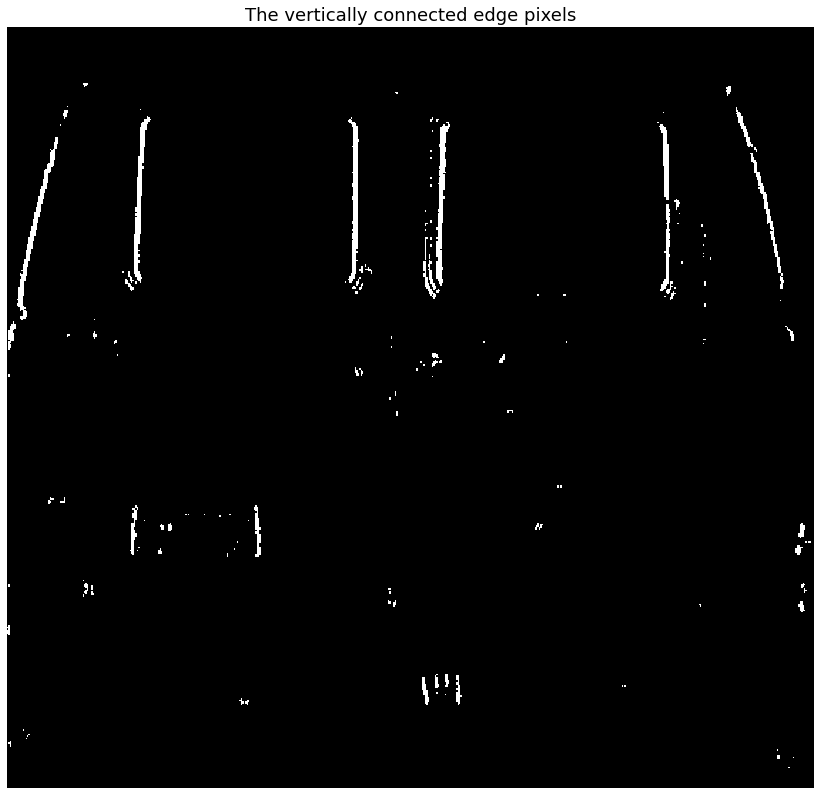

In [55]:
plt.figure(figsize=(20,14))
plt.imshow(gv,cmap='gray')
plt.axis('off')
plt.title('The vertically connected edge pixels')

The first image, gh, shows the horizontal oriented pixels and the second one shows the vertical orinted pixels. By setting A=0, the horizontal edges are detected and by setting the A=90, the vetical edges are detected. All the edges has angles between -45 and 45 are detected for horizontal and between 90-45 and 90+45 for vertical edge pixels.

### (d) (Graduate Only) Link Horizontal Edges:

Text(0.5, 1.0, 'The horizontal edge linking')

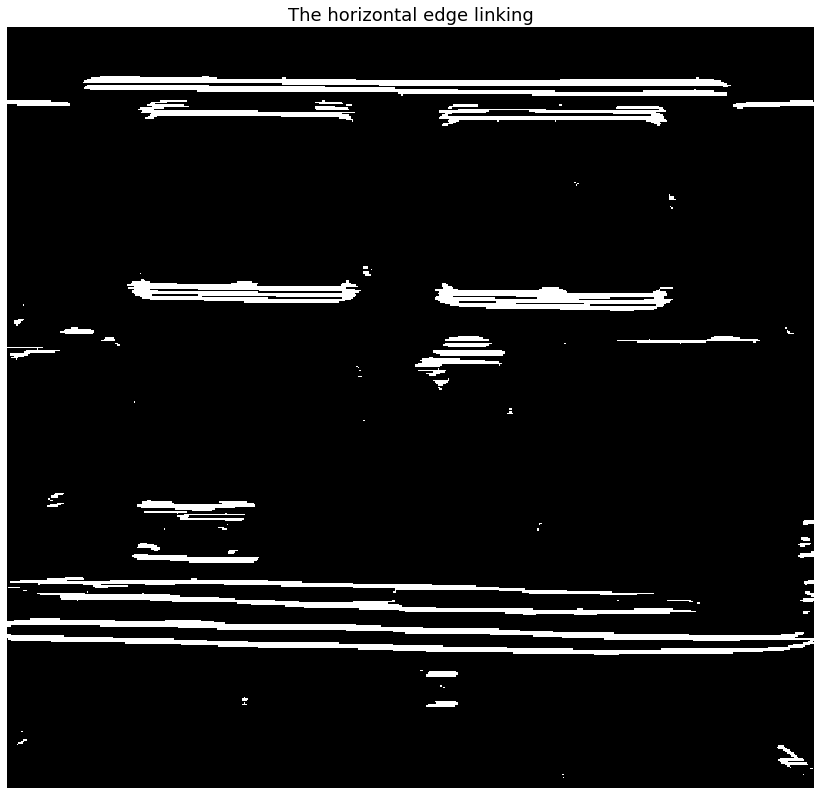

In [60]:
L = 25 
gh_conn = gh
row_number, column_number = gh.shape
for i in range(row_number):
    counter = 0
    edge_begin = 0
    for j in range(column_number):
        if (gh[i,j] == 1) and (counter == 0):
            edge_begin = 1
        elif (gh[i,j] == 1) & (counter > L):
            counter = 0
        elif (gh[i,j] == 0) & (edge_begin == 1):
            counter += 1
        elif (gh[i,j] == 1) & (counter <= L):
            gh_conn[i,j-counter:j] = 1
            edge_begin = 0
            counter = 0
                      
plt.figure(figsize=(20,14))
plt.imshow(gh_conn,cmap='gray')
plt.axis('off')
plt.title('The horizontal edge linking')

With the help of the local processing, all edge pixels bounded between two 1 intensity are horizontally conneted to each other, if the gap between them is not more than 25 pixles. Thus, the result image has the unbroken horizontal edges. By comparing this image with the horizontally connected edge pixels in part (c), thsi image illustrated the edges better because the edges are lines and they are unbroken.

### (e) (Graduate Only) Link Vertical Edges:

Text(0.5, 1.0, 'The vertical edge linking')

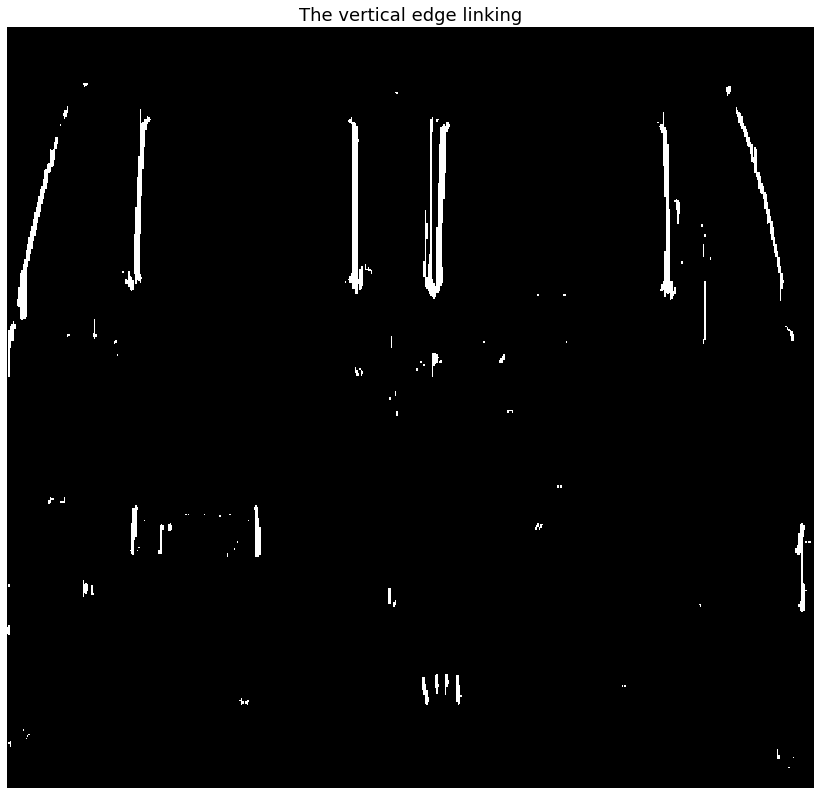

In [61]:
L = 25 
gv_T = gv.T
gv_conn = gv.T
row_number, column_number = gv_T.shape
for i in range(row_number):
    counter = 0
    edge_begin = 0
    for j in range(column_number):
        if (gv_T[i,j] == 1) and (counter == 0):
            edge_begin = 1
        elif (gv_T[i,j] == 1) & (counter > L):
            counter = 0
        elif (gv_T[i,j] == 0) & (edge_begin == 1):
            counter += 1
        elif (gv_T[i,j] == 1) & (counter <= L):
            gv_conn[i,j-counter:j] = 1
            edge_begin = 0
            counter = 0

gv_conn = gv_conn.T          
plt.figure(figsize=(20,14))
plt.imshow(gv_conn,cmap='gray')
plt.axis('off')
plt.title('The vertical edge linking')

The vertical edge pixels are connected to each other to have the unbroken vertical edges. The local processing method, fill all gaps between to detected edge pixels if the length does not exceed 25. By comparing this image with the vertically connected edge pixels in part (c), the edges in the image of this part is unbroken and vividly shows the edges of the original image.

### (f) (Graduate Only) Horizontal and Vertical Edges:

Text(0.5, 1.0, 'The vertical edge linking')

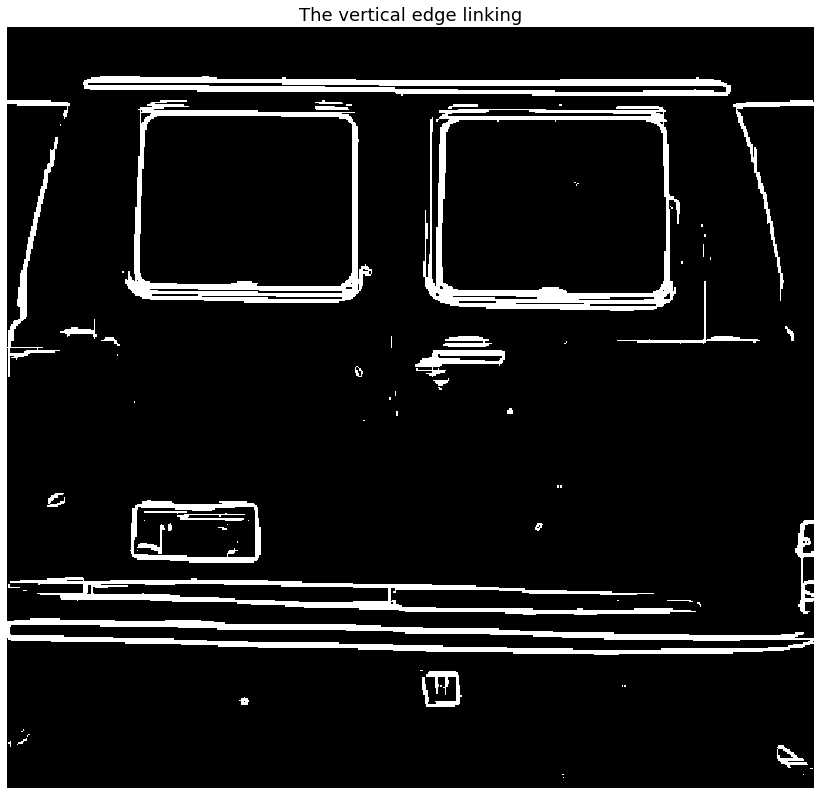

In [65]:
g_conn = gh_conn + gv_conn       
plt.figure(figsize=(20,14))
plt.imshow(g_conn,cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('The vertical edge linking')

This image shows all the vertical and horizontal deges of the image clearly. All the deges are detected with good accuracy. However, the edge lines are thick. If the lines become thin, it can better shows the image edges.